In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('churn-data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [4]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [5]:
df.totalcharges = df.totalcharges.fillna(0)

In [6]:
df.churn = (df.churn == 'yes').astype(int)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [10]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [11]:
df_train.reset_index(drop = True)
df_val.reset_index(drop = True)
df_test.reset_index(drop = True)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8879-zkjof,female,0,no,no,41,yes,no,dsl,yes,...,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),79.85,3320.75,0
1,0201-mibol,female,1,no,no,66,yes,yes,fiber_optic,yes,...,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),102.40,6471.85,0
2,1600-dilpe,female,0,no,no,12,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,bank_transfer_(automatic),45.00,524.35,0
3,8601-qacrs,female,0,no,no,5,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,50.60,249.95,1
4,7919-zodzz,female,0,yes,yes,10,yes,no,dsl,no,...,yes,no,no,yes,one_year,yes,mailed_check,65.90,660.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,5130-iekqt,male,1,no,no,25,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,no,mailed_check,105.95,2655.25,1
1405,4452-rohmo,female,0,no,no,15,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.60,331.60,0
1406,6164-haqtx,male,0,no,no,71,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,bank_transfer_(automatic),53.95,3888.65,0
1407,3982-dqlus,male,1,yes,yes,65,yes,yes,fiber_optic,yes,...,no,no,no,no,month-to-month,yes,electronic_check,85.75,5688.45,0


In [12]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [13]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [14]:
global_churn_rate = df_full_train.churn.mean()


In [1]:
numerical = ['tenure', 'monthlycharges', 'totalcharges'] # 3 numerical
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [16]:
from sklearn.feature_extraction import DictVectorizer

In [22]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [17]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [18]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
y_pred

churn_decision = y_pred >= .5
churn_decision.astype(int)

df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred.correct.mean()


C:\Users\Luke Luo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8034066713981547

## **Accuracy and Dummy Model**

In [24]:
len(y_val)

1409

In [25]:
(y_val == churn_decision).mean()

0.8034066713981547

In [26]:
1132/1409

0.8034066713981547

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_val, y_pred >= .5)

0.8034066713981547

In [36]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.765
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [30]:
from matplotlib import pyplot as plt

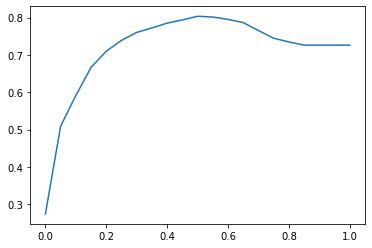

In [31]:
plt.plot(thresholds, scores)

In [37]:
from collections import Counter

In [38]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [39]:
Counter(y_val)

Counter({0: 1023, 1: 386})

In [40]:
y_val.mean()

0.2739531582682754

## **Confusion table**

In [41]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [43]:
t = .5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [45]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [46]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

In [47]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## **Precision and Recall**

In [48]:
(tp+tn)/(tp+tn+fp+fn)

0.8034066713981547

In [50]:
precision = tp/(tp+fp)
precision

0.6752411575562701

In [51]:
recall = tp/(tp+fn)
recall

0.5440414507772021

## **ROC Curves**

In [54]:
tpr = tp/(tp+fn)
tpr

0.5440414507772021

In [53]:
fpr = fp/(fp+tn)
fpr

0.09872922776148582

In [56]:
thresholds = np.linspace(0, 1, 101)
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    scores.append((t, tp, fp, fn, tn))

In [58]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [67]:
df_scores['tpr'] = (df_scores.tp/ (df_scores.tp + df_scores.fn))
df_scores['fpr'] = (df_scores.fp/ (df_scores.fp + df_scores.tn))

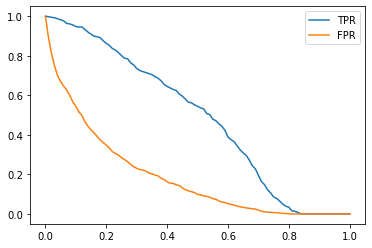

In [68]:
plt.plot(thresholds, df_scores.tpr, label='TPR')
plt.plot(thresholds, df_scores.fpr, label='FPR')
plt.legend()

In [69]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [70]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [86]:
def tpr_fpr_dataframe(y_val, y_pred):
    thresholds = np.linspace(0, 1, 101)
    scores = []

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        scores.append((t, tp, fp, fn, tn))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    df_scores['tpr'] = (df_scores.tp/ (df_scores.tp + df_scores.fn))
    df_scores['fpr'] = (df_scores.fp/ (df_scores.fp + df_scores.tn))
    
    return df_scores

In [87]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

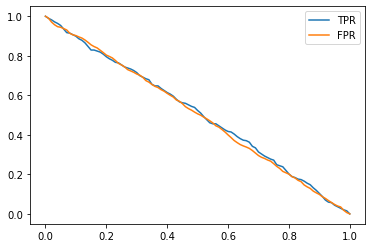

In [88]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()

In [79]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [80]:
# Ideal model
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [81]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [82]:
(1-y_val).mean()

0.7260468417317246

In [84]:
((y_ideal_pred >= .726) == y_ideal).mean()

1.0

In [90]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

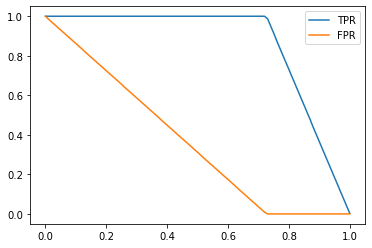

In [91]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()

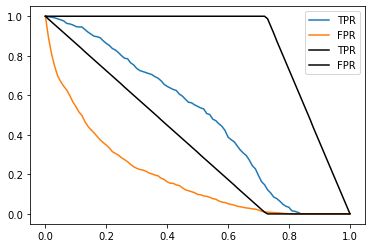

In [96]:
plt.plot(thresholds, df_scores.tpr, label='TPR')
plt.plot(thresholds, df_scores.fpr, label='FPR')

#plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
#plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')

plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR', color='black')

plt.legend()

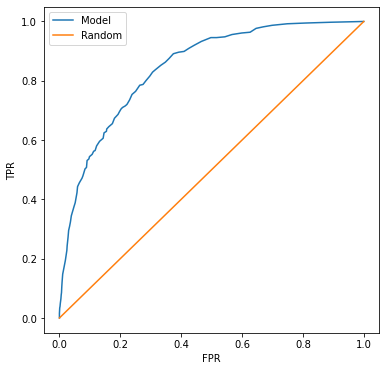

In [104]:
plt.figure(figsize=(6, 6))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')

plt.plot([0, 1], label='Random')

#plt.plot(df_rand.fpr, df_rand.tpr, label='Random')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [105]:
from sklearn.metrics import roc_curve

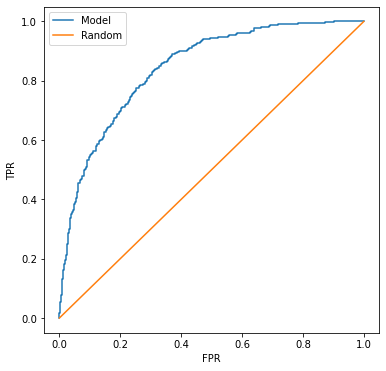

In [107]:
plt.figure(figsize=(6, 6))
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.plot(fpr, tpr, label='Model')

plt.plot([0, 1], label='Random')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## **ROC AUC**
### (Area Under the roc Curve)

In [108]:
from sklearn.metrics import auc

In [109]:
auc(fpr, tpr)

0.8438682327199793

In [112]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.9999430203759136

In [113]:
from sklearn.metrics import roc_auc_score

In [114]:
roc_auc_score(y_val, y_pred)

0.8438682327199793

In [115]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [115]:
import random

In [119]:
n = 10000
successes = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos)-1)
    neg_ind = random.randint(0, len(neg)-1)
    
    if (pos[pos_ind] > neg[neg_ind]):
        successes = successes + 1
        
successes / n

0.8382

In [126]:
n = 50000
np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

In [127]:
(pos[pos_ind] > neg[neg_ind]).mean()

0.84654

## **Cross Validation**

In [152]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [153]:
dv, model = train(df_train, y_train, C=0.001)

In [154]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [155]:
predict(df_val, dv, model)

array([0.17300479, 0.01156179, 0.6660405 , 0.14145727, 0.56402903,
       0.44582222, 0.31992153, 0.35552906, 0.00569753, 0.09182   ,
       0.04423489, 0.02191388, 0.39280375, 0.71474188, 0.44401241,
       0.17644587, 0.46901761, 0.28189229, 0.3425314 , 0.07436954,
       0.71231845, 0.06266745, 0.0057283 , 0.69107417, 0.71901914,
       0.10682377, 0.67169698, 0.10436778, 0.60299973, 0.00913703,
       0.06164475, 0.01676424, 0.27507368, 0.53172285, 0.29836229,
       0.15105945, 0.47493275, 0.27450965, 0.77489937, 0.76761032,
       0.27361925, 0.31712996, 0.62969987, 0.03442926, 0.00465985,
       0.54559392, 0.48845875, 0.44099222, 0.08376139, 0.51797538,
       0.01740844, 0.03237379, 0.45252865, 0.40902847, 0.21394695,
       0.12354893, 0.01116875, 0.4137111 , 0.037475  , 0.00802513,
       0.03953107, 0.73783056, 0.40502411, 0.08822611, 0.62981897,
       0.08260475, 0.73487229, 0.09958164, 0.19766941, 0.03788468,
       0.32556791, 0.43236989, 0.30389346, 0.32922706, 0.66394

In [135]:
from sklearn.model_selection import KFold

In [136]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [144]:
!pip install tqdm

You should consider upgrading via the 'c:\users\luke luo\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [146]:
from tqdm.auto import tqdm

In [157]:
n_splits = 5

for C in tqdm([.001, .01, .1, .5, 1, 5, 10]):

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append(auc)
    
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.826 +- 0.012
C=0.01 0.841 +- 0.012
C=0.1 0.841 +- 0.012
C=0.5 0.841 +- 0.011
C=1 0.840 +- 0.012
C=5 0.841 +- 0.012
C=10 0.841 +- 0.012


In [159]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1)
y_pred = predict(df_test, dv, model)
    
auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259